In [51]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import os
%matplotlib inline
plt.style.use('seaborn-darkgrid')
from scipy.stats import chi2_contingency
path = os.getcwd()
import numpy as np
import rpy2.robjects.numpy2ri
from rpy2.robjects.packages import importr
rpy2.robjects.numpy2ri.activate()


cod_df = pd.read_csv(f'{path}\\final_filtered_with_codons.csv',index_col = 0)

In [52]:
cod_df = cod_df.dropna(subset = ['trnS','trnL'])

In [53]:
cod_df.value_counts('phylum')

phylum
Chordata           3001
Arthropoda          641
Mollusca             98
Nematoda             49
Echinodermata        38
Platyhelminthes      36
Annelida             32
Porifera             26
Nemertea             11
Entoprocta            8
Rotifera              4
Xenacoelomorpha       4
Hemichordata          2
Bryozoa               2
Brachiopoda           2
Priapulida            2
Phoronida             1
Tardigrada            1
dtype: int64

<AxesSubplot:xlabel='count', ylabel='phylum'>

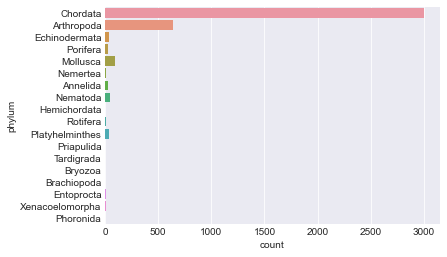

In [54]:
sns.countplot(y = 'phylum', data = cod_df)

In [55]:
cod_df.trnS = cod_df.trnS.astype(bool)
cod_df.trnL = cod_df.trnL.astype(bool)
cod_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3958 entries, Cyprinus carpio to Mastigoproctus giganteus
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   RefSeq           3958 non-null   object
 1   kingdom          3958 non-null   object
 2   phylum           3958 non-null   object
 3   class            3800 non-null   object
 4   order            3934 non-null   object
 5   family           3929 non-null   object
 6   genus            3955 non-null   object
 7   Gene_order       3958 non-null   object
 8   Gene_locations   3958 non-null   object
 9   Notes            3958 non-null   object
 10  tRNA_validation  3958 non-null   object
 11  Intron           3958 non-null   bool  
 12  Full             3958 non-null   bool  
 13  genetic_code     3958 non-null   int64 
 14  Haplotype        43 non-null     object
 15  topology         3958 non-null   object
 16  not_valid        3958 non-null   bool  
 17  Gene

In [56]:
wanted = ['Mollusca','Nematoda','Chordata','Arthropoda','Echinodermata']
cod_df_filt = cod_df[cod_df.phylum.isin(wanted)]
group = cod_df_filt.groupby('phylum')[['trnS','trnL']].mean() * 100
display(group)
group.reset_index(inplace = True)
group = group.melt(id_vars = 'phylum', value_vars = ['trnS','trnL'], var_name = 'tRNA', value_name = 'Discrepancy')


trnS        trnL
phylum                              
Arthropoda     85.647426   90.171607
Chordata       92.269244   92.769077
Echinodermata  50.000000   81.578947
Mollusca       75.510204   85.714286
Nematoda       95.918367  100.000000

PermissionError: [Errno 13] Permission denied: 'C:\\Users\\noam1\\Desktop\\The dynamics of the mitochondrial genome (paper prep)\\figures\\codon_disc_graph.pdf'

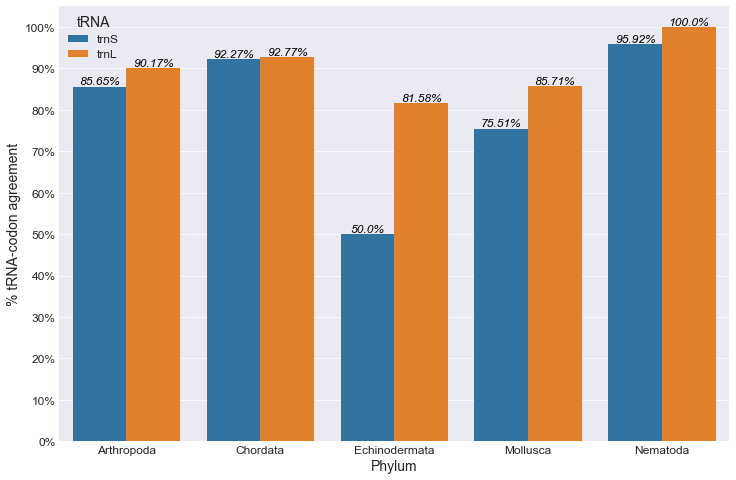

In [57]:


fig, ax = plt.subplots(figsize = (12,8))
ax = sns.barplot(x = 'phylum', y = 'Discrepancy', hue = 'tRNA', ax = ax, data = group)
plt.yticks(ticks = list(range(0,101,10)), labels = [f'{i}%' for i in range(0,101,10)], fontsize = 12)
plt.ylabel('% tRNA-codon agreement', fontsize = 14)
plt.xlabel('Phylum', fontsize = 14)
plt.xticks(fontsize = 12)
plt.setp(ax.get_legend().get_texts(), fontsize='12')
plt.setp(ax.get_legend().get_title(), fontsize='14')
x_offset = 0.2
y_offset = 0.5
x = np.tile(np.arange(len(group.phylum)/2),2)
c=0
for index, row in group.iterrows():
    trna = row.tRNA
    if trna == 'trnS':
        ax.text(x[c] - x_offset,row.Discrepancy+y_offset,f'{round(row.Discrepancy,2)}%', color = 'black', ha='center', fontsize = 12, fontstyle = 'oblique')
    else:
        ax.text(x[c] + x_offset,row.Discrepancy+y_offset,f'{round(row.Discrepancy,2)}%', color = 'black', ha='center', fontsize = 12, fontstyle = 'oblique')
    c+=1

plt.savefig(r'C:\Users\noam1\Desktop\The dynamics of the mitochondrial genome (paper prep)\figures\codon_disc_graph.pdf')

In [46]:
cod_df_filt[cod_df_filt.phylum == 'Echinodermata']

RefSeq  kingdom         phylum  \
organism                                                                 
Acanthaster brevispinus            NC_007789.1  Metazoa  Echinodermata   
Acanthaster planci                 NC_007788.1  Metazoa  Echinodermata   
Amphipholis squamata               NC_013876.1  Metazoa  Echinodermata   
Amphiura digitula                  NC_042738.1  Metazoa  Echinodermata   
Amphiura sinicola                  NC_045938.1  Metazoa  Echinodermata   
Apostichopus japonicus             NC_012616.1  Metazoa  Echinodermata   
Arbacia lixula                     NC_001770.1  Metazoa  Echinodermata   
Asterias amurensis                 NC_006665.1  Metazoa  Echinodermata   
Astropecten polyacanthus           NC_006666.1  Metazoa  Echinodermata   
Astrospartus mediterraneus         NC_013878.1  Metazoa  Echinodermata   
Echinocardium cordatum             NC_013881.1  Metazoa  Echinodermata   
Florometra serratissima            NC_001878.1  Metazoa  Echinodermata   
Holothuria forskali                NC_013884.1  Metazoa  Echinodermata   
Holothuria pervicax                NC_045853.1  Metazoa  Echinodermata   
Holothuria scabra                  NC_027086.1  Metazoa  Echinodermata   
Luidia quinaria                    NC_006664.1  Metazoa  Echinodermata   
Neogymnocrinus richeri             NC_007689.1  Metazoa  Echinodermata   
Ophiarachnella gorgonia            NC_046053.1  Metazoa  Echinodermata   
Ophiocomina nigra                  NC_013874.1  Metazoa  Echinodermata   
Ophiomastix mixta                  NC_045937.1  Metazoa  Echinodermata   
Ophiopholis japonica               NC_045939.1  Metazoa  Echinodermata   
Ophiopholis mirabilis              NC_045940.1  Metazoa  Echinodermata   
Ophioplocus japonicus              NC_044109.1  Metazoa  Echinodermata   
Ophiura albida                     NC_010691.1  Metazoa  Echinodermata   
Ophiura sarsii                     NC_044861.1  Metazoa  Echinodermata   
Ophiura luetkenii                  NC_005930.1  Metazoa  Echinodermata   
Paracentrotus lividus              NC_001572.1  Metazoa  Echinodermata   
Parastichopus nigripunctatus       NC_013432.1  Metazoa  Echinodermata   
Stichopus horrens                  NC_014454.1  Metazoa  Echinodermata   
Stichopus sp.                      NC_014452.2  Metazoa  Echinodermata   
Strongylocentrotus droebachiensis  NC_009940.1  Metazoa  Echinodermata   
Strongylocentrotus pallidus        NC_009941.1  Metazoa  Echinodermata   
Strongylocentrotus purpuratus      NC_001453.1  Metazoa  Echinodermata   
Cucumaria miniata                  NC_005929.1  Metazoa  Echinodermata   
Patiria pectinifera                NC_001627.1  Metazoa  Echinodermata   
Phanogenia gracilis                NC_007690.1  Metazoa  Echinodermata   
Ophiura lutkeni                      NC_005930  Metazoa  Echinodermata   
Luidia quinalia                      NC_006664  Metazoa  Echinodermata   

                                           class            order  \
organism                                                            
Acanthaster brevispinus               Asteroidea        Valvatida   
Acanthaster planci                    Asteroidea        Valvatida   
Amphipholis squamata                 Ophiuroidea        Ophiurida   
Amphiura digitula                    Ophiuroidea        Ophiurida   
Amphiura sinicola                    Ophiuroidea        Ophiurida   
Apostichopus japonicus             Holothuroidea  Aspidochirotida   
Arbacia lixula                        Echinoidea        Arbacoida   
Asterias amurensis                    Asteroidea    Forcipulatida   
Astropecten polyacanthus              Asteroidea      Paxillosida   
Astrospartus mediterraneus           Ophiuroidea        Euryalida   
Echinocardium cordatum                Echinoidea      Spatangoida   
Florometra serratissima                Crinoidea       Comatulida   
Holothuria forskali                Holothuroidea  Aspidochirotida   
Holothuria pervicax                Holothuro

In [20]:

stats = importr('stats')
m = np.array(trns_cross)
res = stats.fisher_test(m)
print('p-value: {}'.format(res[0][0]))

p-value: 1.5978039652970065e-10


In [36]:
group

phylum  tRNA  Discrepancy
0  Arthropoda  trnS    85.647426
1    Chordata  trnS    92.269244
2    Mollusca  trnS    75.510204
3    Nematoda  trnS    95.918367
4  Arthropoda  trnL    90.171607
5    Chordata  trnL    92.769077
6    Mollusca  trnL    85.714286
7    Nematoda  trnL   100.000000